In [1]:
# ============================================
# 1. Import Library
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# agar tampil lebih rapi
sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [5]:
# ============================================
#  2. Load Dataset
# ============================================
df = pd.read_csv("Crop_recommendation.csv")

# lihat 5 data teratas
df.head()


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [6]:
# ============================================
# 3. Struktur Dataset (baris, kolom, tipe data)
# ============================================
print("Jumlah Baris dan Kolom:\n", df.shape)
print("\nTipe Data:\n")
print(df.dtypes)

print("\nInfo Lengkap Dataset:")
df.info()


Jumlah Baris dan Kolom:
 (2200, 10)

Tipe Data:

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

Info Lengkap Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [7]:
# ============================================
#  4. Statistik Deskriptif
# ============================================
df.describe()


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Unnamed: 8,Unnamed: 9
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,0.0,0.0
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN,NaN
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,NaN,NaN


In [8]:
# ============================================
#  5. Cek Missing Value
# ============================================
df.isnull().sum()


,0
Nitrogen,0
phosphorus,0
potassium,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
Unnamed: 8,2200
Unnamed: 9,2200


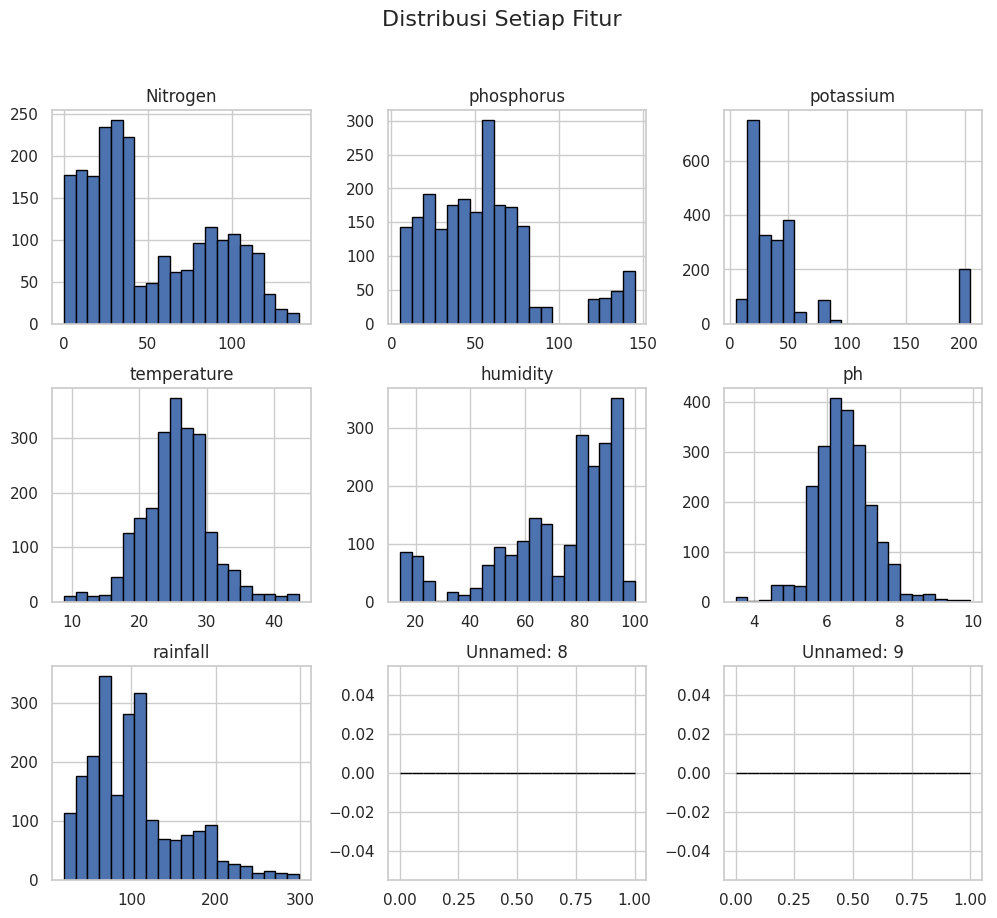

In [9]:
#Distribusi Setiap Fitur (Histogram)
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribusi Setiap Fitur", fontsize=16)
plt.show()


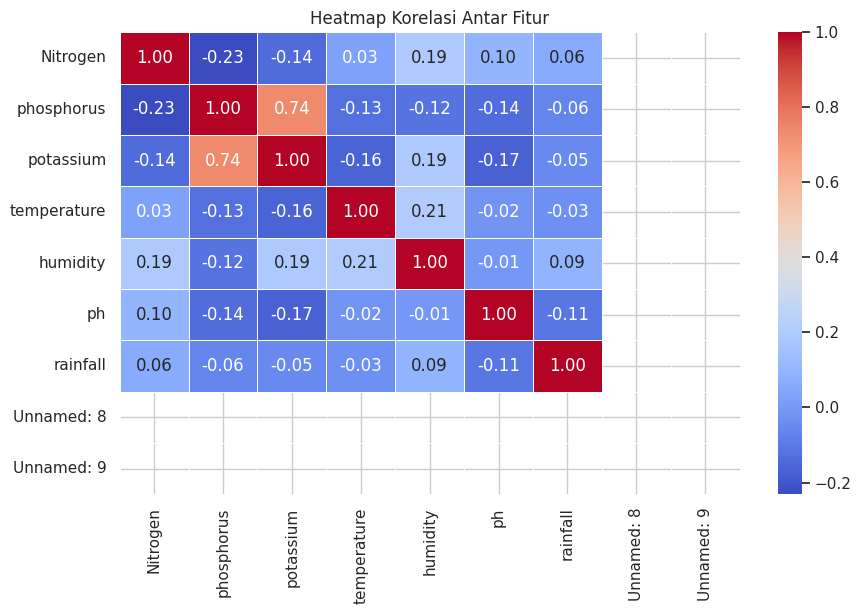

In [10]:
#Heatmap Korelasi
plt.figure(figsize=(10, 6))

numeric_df = df.select_dtypes(include=["int64", "float64"])   # ambil kolom numerik saja

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


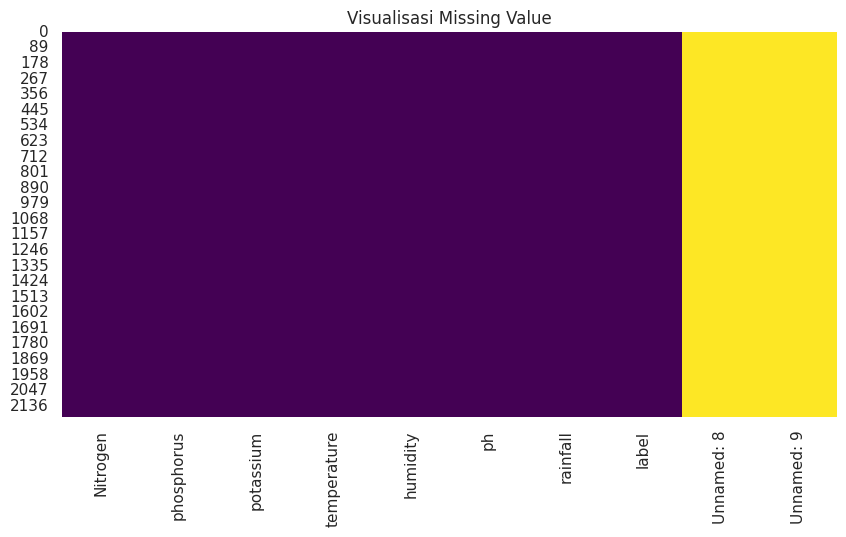

In [11]:
#heatmap missing value
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Value")
plt.show()


In [12]:
import pandas as pd

# Load data
df = pd.read_csv("Crop_recommendation.csv")

print("=== DATA AWAL ===")
print(df.head())
print(df.info())

# Hapus kolom yang 100% kosong
df = df.drop(columns=["Unnamed: 8", "Unnamed: 9"])

# Isi missing value numerik dengan median
df = df.fillna(df.median(numeric_only=True))

print("\n=== SETELAH MISSING VALUE DITANGANI ===")
print(df.head())
print(df.info())


=== DATA AWAL ===
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64 

In [13]:
import numpy as np

num_cols = ["Nitrogen","phosphorus","potassium",
            "temperature","humidity","ph","rainfall"]

def handle_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

print("\n=== JUMLAH DATA SEBELUM MENGHAPUS OUTLIER ===")
print(len(df))

# Terapkan ke seluruh kolom numerik
for col in num_cols:
    df = handle_outliers_iqr(df, col)

print("\n=== JUMLAH DATA SETELAH OUTLIER DIHAPUS ===")
print(len(df))

print("\n=== DATA SETELAH OUTLIER DIHAPUS ===")
print(df.head())
print(df.describe())



=== JUMLAH DATA SEBELUM MENGHAPUS OUTLIER ===
2200

=== JUMLAH DATA SETELAH OUTLIER DIHAPUS ===
1846

=== DATA SETELAH OUTLIER DIHAPUS ===
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
3        74          35         40    26.491096  80.158363  6.980401   
7        94          53         40    20.277744  82.894086  5.718627   
8        89          54         38    24.515881  83.535216  6.685346   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
3  242.864034  rice  
7  241.974195  rice  
8  230.446236  rice  
          Nitrogen   phosphorus    potassium  temperature     humidity  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean     54.210184    45.161430    32.745937    25.711188    69.770583   
std      37.928591    22.506246    16.614550     4.155121    22.649324   

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

print("\n=== SETELAH ENCODING KATEGORIK ===")
print(df.head())

# Tampilkan mapping label
print("\nMapping Label:")
for i, cls in enumerate(le.classes_):
    print(f"{cls} → {i}")



=== SETELAH ENCODING KATEGORIK ===
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
3        74          35         40    26.491096  80.158363  6.980401   
7        94          53         40    20.277744  82.894086  5.718627   
8        89          54         38    24.515881  83.535216  6.685346   

     rainfall  label  
0  202.935536     18  
1  226.655537     18  
3  242.864034     18  
7  241.974195     18  
8  230.446236     18  

Mapping Label:
banana → 0
blackgram → 1
chickpea → 2
coconut → 3
coffee → 4
cotton → 5
jute → 6
kidneybeans → 7
lentil → 8
maize → 9
mango → 10
mothbeans → 11
mungbean → 12
muskmelon → 13
orange → 14
papaya → 15
pigeonpeas → 16
pomegranate → 17
rice → 18
watermelon → 19


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\n=== SETELAH NORMALISASI ===")
print(df.head())

print("\n=== STATISTIK SETELAH NORMALISASI ===")
print(df[num_cols].describe())



=== SETELAH NORMALISASI ===
   Nitrogen  phosphorus  potassium  temperature  humidity        ph  rainfall  \
0  0.642857    0.411111     0.4750     0.259066  0.790267  0.500431  0.799151   
1  0.607143    0.588889     0.4500     0.300649  0.770633  0.641414  0.902891   
3  0.528571    0.333333     0.4375     0.521029  0.768751  0.626213  0.973780   
7  0.671429    0.533333     0.4375     0.230962  0.800665  0.293780  0.969888   
8  0.635714    0.544444     0.4125     0.428817  0.808144  0.548477  0.919470   

   label  
0     18  
1     18  
3     18  
7     18  
8     18  

=== STATISTIK SETELAH NORMALISASI ===
          Nitrogen   phosphorus    potassium  temperature     humidity  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean      0.387216     0.446238     0.346824     0.484619     0.647574   
std       0.270919     0.250069     0.207682     0.193979     0.264213   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      

In [16]:
# Pastikan df_clean sudah berisi data yang sudah dibersihkan
df_clean = df.copy()

# Simpan data bersih dengan nama yang sesuai
df_clean.to_csv("Crop_recommendation_clean.csv", index=False)

print("Data bersih berhasil disimpan sebagai Crop_recommendation_clean.csv")


Data bersih berhasil disimpan sebagai Crop_recommendation_clean.csv


1.**Load Data Set**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation_clean.csv to Crop_recommendation_clean (1).csv


**Import Library**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2.**Load Dataset & Split Data**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Crop_recommendation_clean.csv")

X = df[[
    "Nitrogen",
    "phosphorus",
    "potassium",
    "temperature",
    "humidity",
    "ph",
    "rainfall"
]]

y = df["label"]

# Encoding label
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**BASELINE MODEL**

3.**Baseline Model — KNN (Default)**

In [20]:
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)

y_pred_base = knn_baseline.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
print("Baseline KNN Accuracy:", acc_base)


Baseline KNN Accuracy: 0.9756756756756757


**MODEL FINAL**

**4.Model Final 1 — KNN (Optimasi k)**

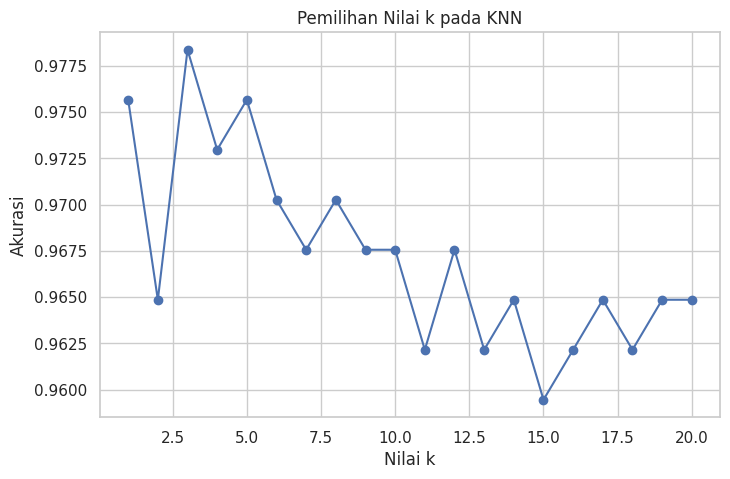

Nilai k terbaik: 3


In [21]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.title("Pemilihan Nilai k pada KNN")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Nilai k terbaik:", best_k)

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)


**5.Model Final 2 — Decision Tree (Pembanding)**

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.981081081081081


**6.EVALUASI MODEL**



Akurasi KNN: 0.9783783783783784
Akurasi Decision Tree: 0.981081081081081
=== KNN ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        20
           6       0.95      0.90      0.92        20
           7       1.00      1.00      1.00        20
           8       0.86      0.95      0.90        20
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        19
          11       1.00      0.83      0.91        12
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00       

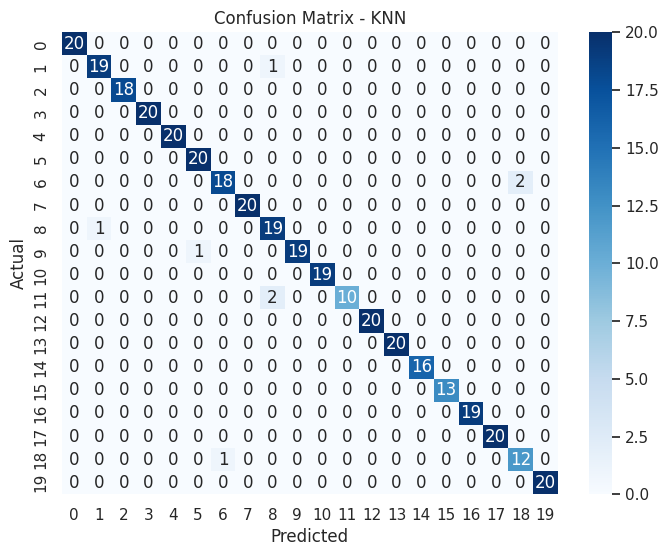

In [23]:
#Akurasi
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("Akurasi KNN:", acc_knn)
print("Akurasi Decision Tree:", acc_dt)

#Classification Report
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))

#Confusion Matrix (KNN)
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# SIMPAN GAMBAR (SEBELUM SHOW)
plt.savefig("Confusion_matrix_knn.png", dpi=300, bbox_inches="tight")

plt.show()


**7.TABEL PERBANDINGAN MODEL**




In [24]:
results = pd.DataFrame({
    "Model": ["Baseline KNN", "KNN Final", "Decision Tree"],
    "Accuracy": [acc_base, acc_knn, acc_dt]
})

results

,Model,Accuracy
0,Baseline KNN,0.975676
1,KNN Final,0.978378
2,Decision Tree,0.981081


In [25]:
results.to_csv("evaluation_results.csv", index=False)